# Laboratorio 8: Implementación algoritmo de regresión lineal
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   David Santiago Rodríguez
2.   David Tobón Molina

**Número del grupo**

Grupo 10

# **Regresión lineal**

Considere el conjunto de puntos:\
 $(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), ... , (x^{(m)},y^{(m)})$,

donde se asume que se relacionan a través de la ecuación:

\begin{align*}
  y^{(i)} \approx β_{1} + &x^{(i)}β_{2}\\
 \end{align*}

Encontrar $\beta=[\beta_1,\beta_1]^T$ se resuelve a través de la solución del problema de mínimos cuadrados:

\begin{align*}
  \min_\beta ||y-H\beta||_2^2,
 \end{align*}

donde $y$ y $H$ se contruyen a partir de los datos como se vio en clase. La solución analítica de este problema tiene la forma:

\begin{align*}
  \beta^* =  (H^TH)^{-1}H^Ty
\end{align*}
 
Ahora, sigua los siguientes pasos:

1. Teniendo en cuenta los datos anexados en la actividad en archivo excel, use la libreria *pandas* para procesarlos y trabajar con ellos. La primera columna corresponde a los valores de $x$ y la segunda a los valores de $y$.


In [21]:
import pandas as pd
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
archivo = pd.read_excel('data.xlsx', header=None)


2. Construya la matriz $H$ y el vector $y$.

In [38]:
x = archivo[0].to_numpy()
y = archivo[1].to_numpy()
H = np.ones((len(x),2))
for i in range(0,len(x)):
    H[i,1] = x[i]

3. Encuentre los valores de $\beta^*$.

In [36]:
h_mul = np.dot(H.T,H)
b = (np.linalg.inv((h_mul))).dot(H.T).dot(y)

[0.07893785 5.09970266]


4. Grafique la recta obtenida junto a los datos anexados.

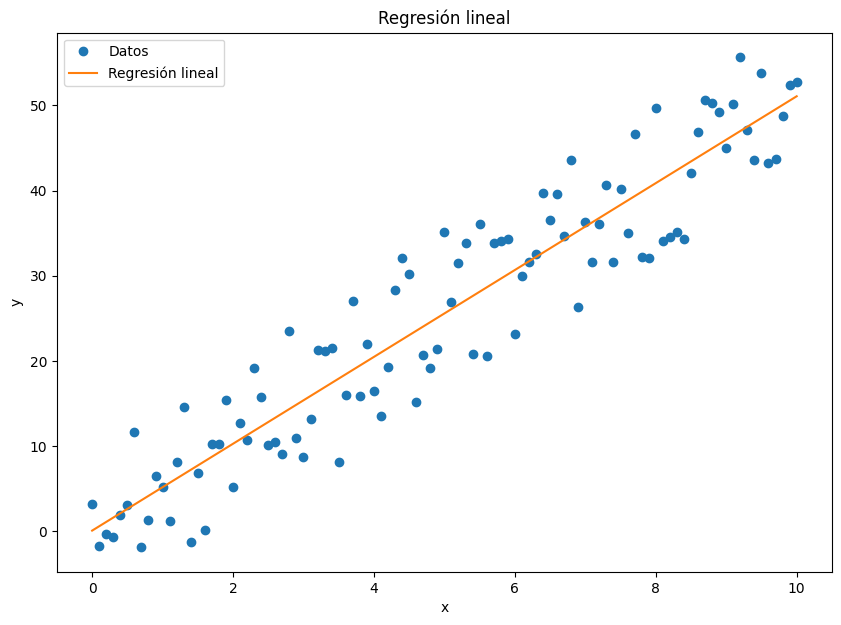

In [81]:
yVals = np.zeros(len(x))
for i in range(0,len(x)):
    yVals[i] = b[0] + b[1]*x[i]
plt.figure(figsize=(10,7))
plt.plot(x,y,'o')
plt.plot(x,yVals)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión lineal')
plt.legend(['Datos','Regresión lineal'])
plt.show()

5. Con los coeficientes hallados, se desea comparar el error con otras dos parejas de coeficientes:

 - $\beta_a=[\beta_1^*+5, \beta_2^*-1]^T$
 - $\beta_b=[\beta_1^*-5, \beta_2^*+1]^T$.

Determine el valor de:

  \begin{align*}
  ||y-H\beta||_2^2
 \end{align*}

para $\beta^*$, $\beta_a$, y $\beta_b$. Aquí los valores de $y$ y $H$ son los mismos para todos ya que los datos no cambian. Explique los resultados obtenidos. 

In [78]:
ba = np.array([b[0]+5,b[1]-1])
bb = np.array([b[0]-5,b[1]+1])


error_b1 = (np.linalg.norm(y-np.dot(H,b)))**2
error_b2 = (np.linalg.norm(y-np.dot(H,ba.T)))**2
error_b3 = (np.linalg.norm(y-np.dot(H,bb.T)))**2
print(error_b1)
print(error_b2)
print(error_b3)


[5.07893785 4.09970266]
[-4.92106215  6.09970266]
2905.840606119537
3764.3406061195474
3764.3406061195255


6. Grafique el las tres rectas (es decir, las obtenidas por $\beta^*$, $\beta_a$, y $\beta_b$)  junto a los datos anexados. En un scatter plot pinte los datos en el archivo, y pinte las tres rectas traslapadas con tres colores diferentes. Interprete los resultados obtenidos.

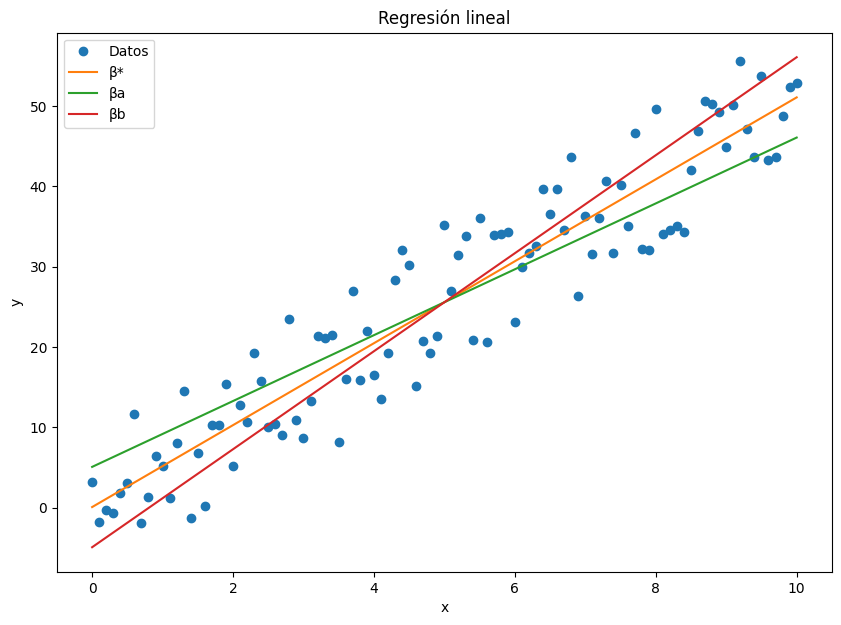

In [80]:
def graph(b,x):
    y_valores = np.zeros(len(x))
    for i in range(0,len(x)):
        y_valores[i] = b[0] + b[1]*x[i]
    return y_valores

b_ast = graph(b,x)
b_a = graph(ba,x)
b_b = graph(bb,x)
bs = [b_ast, b_a, b_b]

plt.figure(figsize=(10,7))
plt.plot(x,y,'o')
for i in range(0,len(bs)):
    plt.plot(x,bs[i])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión lineal')
plt.legend(['Datos','β*','βa','βb'])
plt.show()